In [7]:
from mtbs_utils import initialize_gee,display_mtbs_burn_severity
from mtbs_utils import display_mtbs_boundaries,display_mtbs_by_event_id
from mtbs_utils import get_mtbs_properties,get_mtbs_time_series_by_Ig_date
import matplotlib.pyplot as plt

In [8]:
# Call the function to initialize GEE
initialize_gee()

Google Earth Engine initialized successfully.


In [9]:
# Example usage of the function
start_date = '2016-01-01'
end_date = '2021-12-31'
bbox = [-124.4, 32.5, -114.1, 42.0]  # Bounding box for California
event_id = 'CA3983912034520210702'  # Replace with your desired Event ID


In [10]:
# Call the function and display the map
display_mtbs_burn_severity(start_date, end_date, bbox)

Map(center=[37.25, -119.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [11]:
# Call the function and display the map
display_mtbs_boundaries(bbox,start_date,end_date)

Map(center=[37.25, -119.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [12]:
# Call the function and display the map
display_mtbs_by_event_id(event_id)

Google Earth Engine initialized successfully.
Displaying feature with Event_ID: CA3983912034520210702


Map(center=[39.93642291484538, -120.17855459031658], controls=(WidgetControl(options=['position', 'transparent…

In [13]:
# Call the function and get the DataFrame
df = get_mtbs_properties(event_id)

df

,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Comment,Event_ID,High_T,Ig_Date,IncGreen_T,Incid_Name,...,Map_ID,Map_Prog,Mod_T,NoData_T,Perim_ID,Post_ID,Pre_ID,dNBR_offst,dNBR_stdDv,irwinID
0,Initial,108368,39.957,-120.181,CA3987512036820210703 is a duplicate of this f...,CA3983912034520210702,650,1625209200000,-150,SUGAR,...,10024011,MTBS,450,-970,,804303220210805,804303220200701,44,32,33088F36-F802-4500-86A4-82DA6A62425F


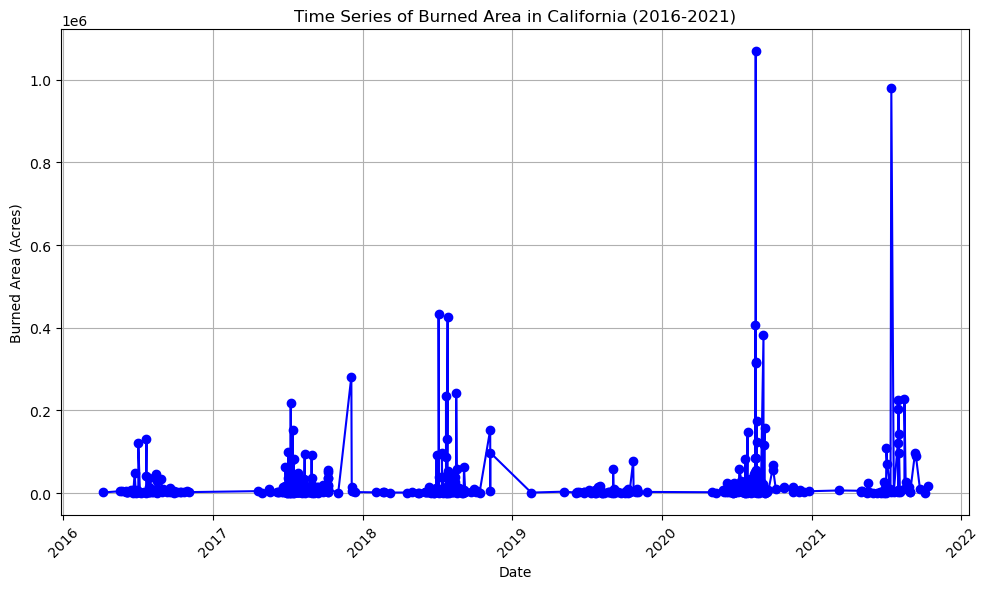

In [14]:
# Get the time series DataFrame
df = get_mtbs_time_series_by_Ig_date(bbox,start_date, end_date)

# Plot the time series
if not df.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['BurnBndAc'], marker='o', linestyle='-', color='b')
    plt.title('Time Series of Burned Area in California (2016-2021)')
    plt.xlabel('Date')
    plt.ylabel('Burned Area (Acres)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified AOI and Ig_Date range.")